# Задание **Ultra pro**

Создайте текстовый документ с:
 - фамилиями студентов ('**student**')
 - местом обучения ('**university**')
 - факультетом ('**faculty**')
 - курсом ('**course**')
 - контактной информацией ('**ID number**')
 
C использованием XML таким образом, чтобы в документе можно было быстро найти куски текста с именами
людей и контактами.

Конвертируйте этот же документ из задания в формат JSON.
Код создать в ноутбуке Collaboratory. Для удобства используйте
библиотеки:
- import xml.etree.ElementTree as ET
- import json

# Подключение бибилотек

In [ ]:
import xml.etree.ElementTree as ET
import json

Для решения этой задачи нужно обратиться к документации
которая доступна по данной ссылке 
https://docs.python.org/3/library/xml.etree.elementtree.html

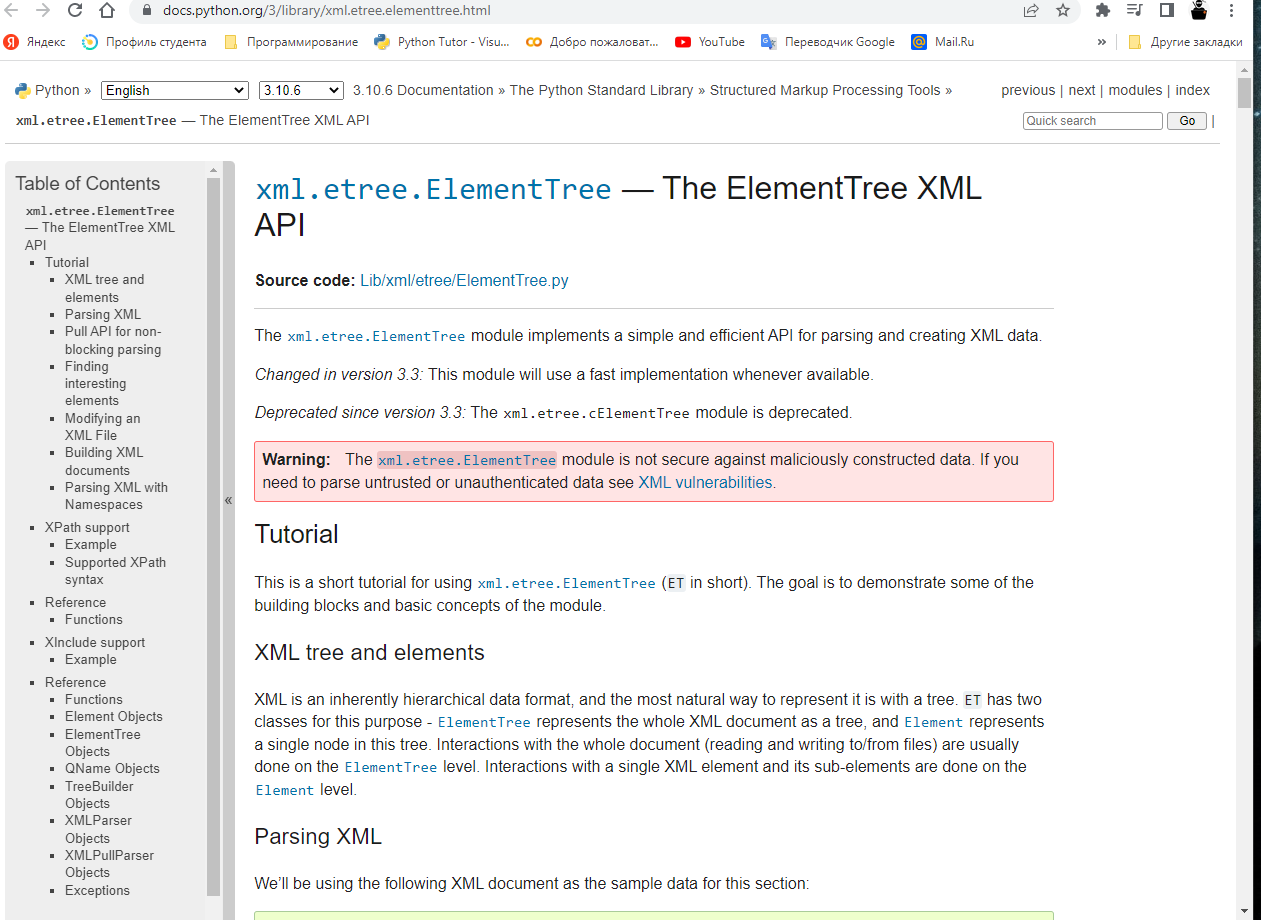

# Создание данных

In [ ]:
# Для начала создадим список 

# Фамилия студента
# Место обучения
# Факультет
# Курс
# Контактная информация

students = [['Ефимов',   'СПбГУ', 'Экономика',                '4', 'id54323'],
            ['Лазарева', 'МИРЭА', 'Радиотехнический',         '2', 'id61626'],
            ['Миронов',  'СГУПС', 'Математика и информатика', '5', 'id52783'],
            ['Серова',   'МАИ',   'Информатика',              '3', 'id91526'],
            ['Волков',   'МГТУ',  'Физика',                   '1', 'id15632']]

## Создание новых подэлементов

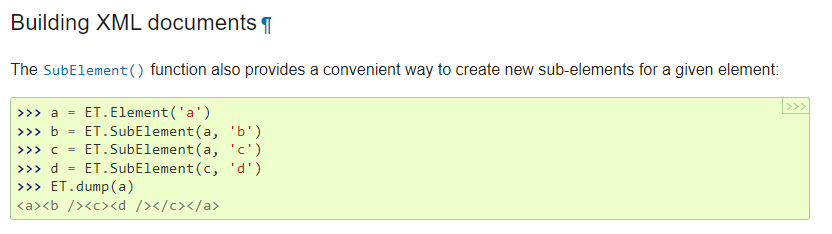

In [ ]:
# С помощью функции Element() создадим новый подэлемент данного элемента

top = ET.Element('top')

In [ ]:
# Теперь с помощью функции SubElement зададим определенный тег, сделаем это в цикле

for i in students:
  el = ET.Element('el')
  student = ET.SubElement(el, 'Студент')
  student.text = i[0]
  university=ET.SubElement(el,'Университет')
  university.text=i[1]
  faculty=ET.SubElement(el,'Факультет')
  faculty.text=i[2]
  course=ET.SubElement(el,'Курс')
  course.text=i[3]
  number=ET.SubElement(el,'Номер')
  number.text=i[4]

  top.append(el)

In [ ]:
top

<Element 'top' at 0x7fefc0430fb0>

Далее нужно декодировать данные в строку

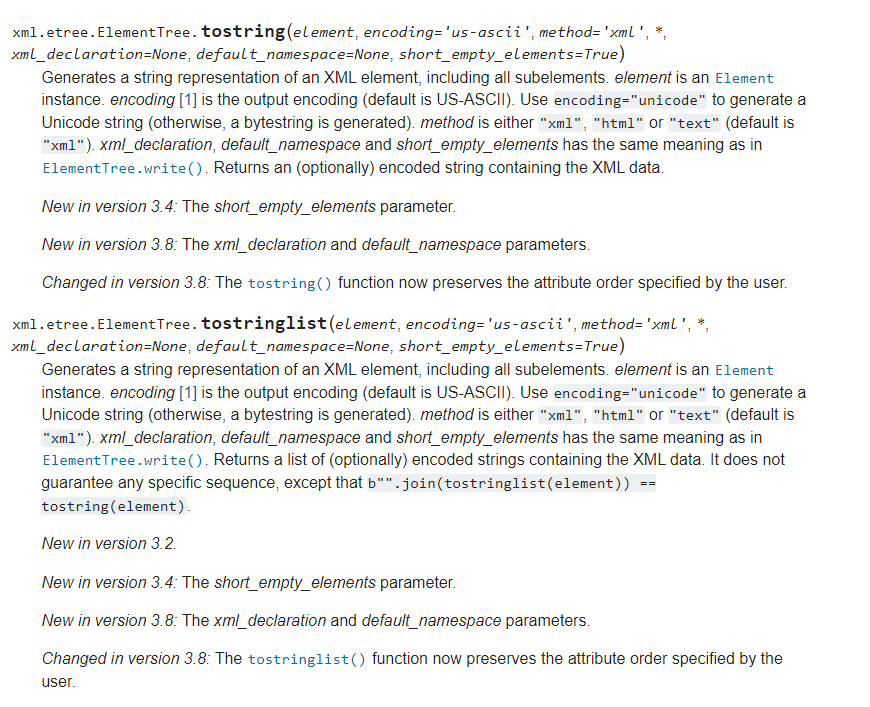

In [ ]:
xml_str = ET.tostring(top).decode()

Затем через функцию **minidom** перевести в новый формат

In [ ]:
from xml.dom import minidom
from xml.dom.minidom import parse, parseString

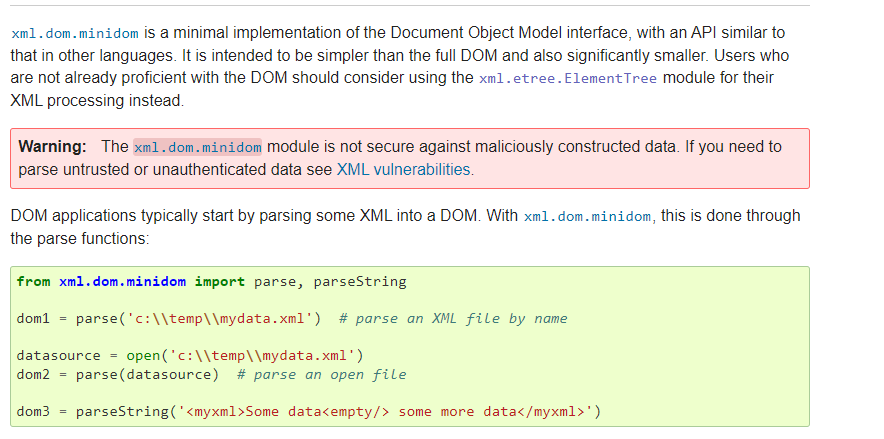

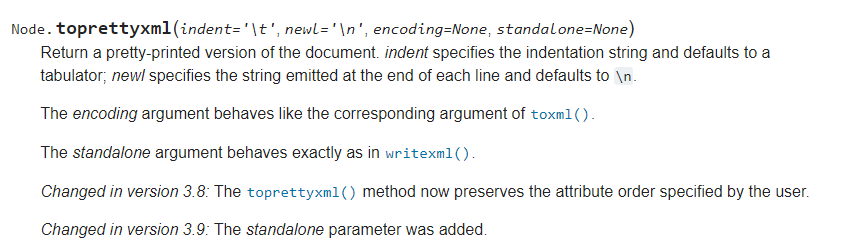

In [ ]:
xml = minidom.parseString(xml_str).toprettyxml()

ExpatError: ignored

**Код выдает *ошибку*. Это связано с тем что присутствуют русские буквы. Надо изменить название тэгов на латинский алфавит.**

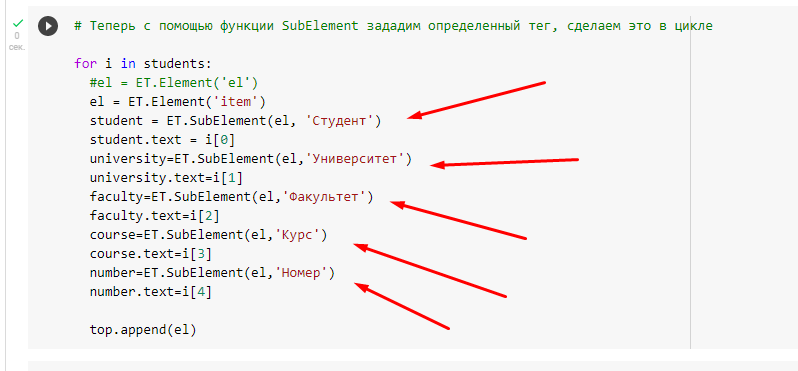

In [ ]:
top = ET.Element('top')

for i in students:
  el = ET.Element('el')
  student = ET.SubElement(el, 'student')
  student.text = i[0]
  university = ET.SubElement(el,'university')
  university.text = i[1]
  faculty = ET.SubElement(el,'faculty')
  faculty.text = i[2]
  course = ET.SubElement(el,'course')
  course.text = i[3]
  number = ET.SubElement(el,'number')
  number.text = i[4]

  top.append(el)

In [ ]:
xml_str = ET.tostring(top).decode()

Пробуем снова

In [ ]:
xml = minidom.parseString(xml_str).toprettyxml()

Получилось!!!!

Открываем файл в режим записи 'w' и записываем в него форматированную строку

In [ ]:
with open('students.xml', 'w') as file:
  file.write(xml)

Создался файл **xml**

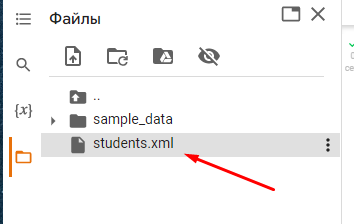

Внутри файла:

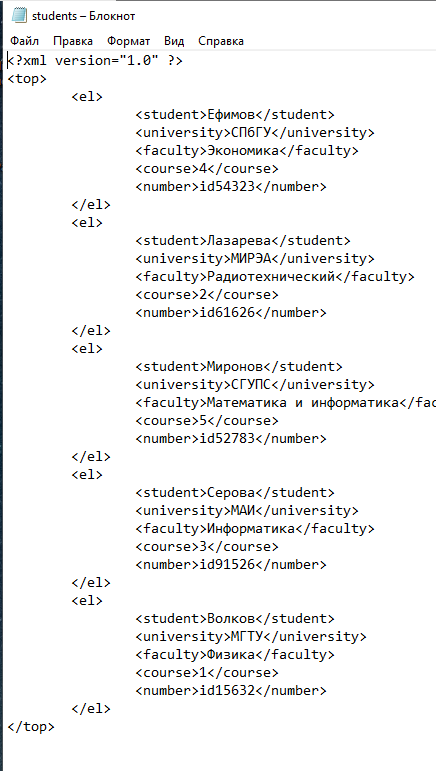

# Конвертация в формат JSON

Для того чтобы была загрузка из файла xml парсим этот файл методом **.getroot()**

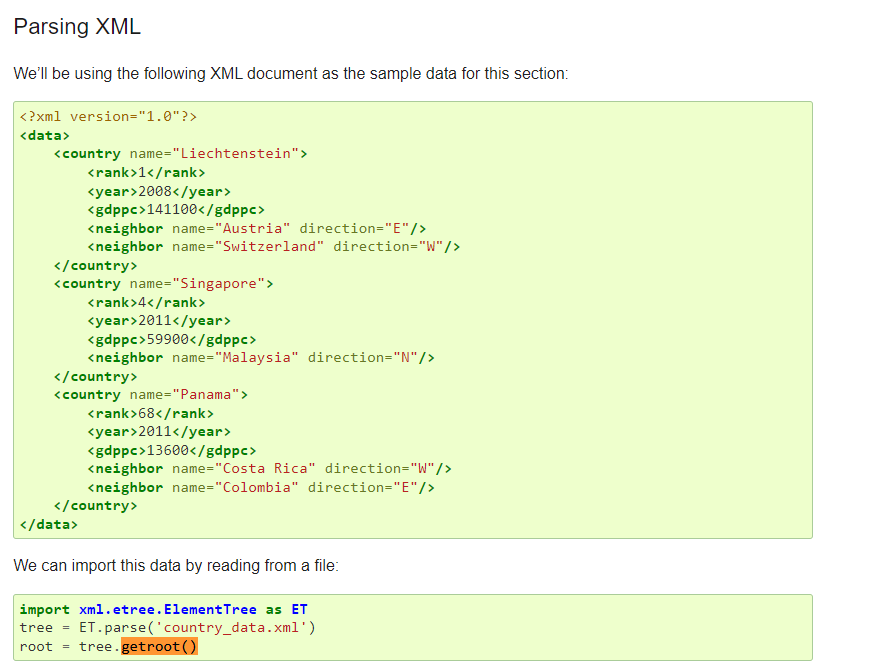

In [ ]:
gertroot = ET.parse('students.xml').getroot()

**Проверим что находится внутри**

In [ ]:
gertroot

<Element 'top' at 0x7fefc042fd70>

In [ ]:
list(gertroot[0])

[<Element 'student' at 0x7fefc042fb30>,
 <Element 'university' at 0x7fefc042fc50>,
 <Element 'faculty' at 0x7fefc042fd10>,
 <Element 'course' at 0x7fefc042fa10>,
 <Element 'number' at 0x7fefc042fa70>]

In [ ]:
gertroot[0][0].text

'Ефимов'

In [ ]:
gertroot[0][1].text

'СПбГУ'

In [ ]:
# Создаем пустой словарь, так как JSON создается из словаря
dct = {}

In [ ]:
# Далее циклом перебираем все значения уровня 0 - 1,2,3,4
# И записывает в словарь dct.
for i in gertroot:
  dct[i[0].text]=[i[1].text, i[2].text, i[3].text, i[4].text]

In [ ]:
print(dct)

{'Ефимов': ['СПбГУ', 'Экономика', '4', 'id54323'], 'Лазарева': ['МИРЭА', 'Радиотехнический', '2', 'id61626'], 'Миронов': ['СГУПС', 'Математика и информатика', '5', 'id52783'], 'Серова': ['МАИ', 'Информатика', '3', 'id91526'], 'Волков': ['МГТУ', 'Физика', '1', 'id15632']}


# Созранение в файл 

In [ ]:
with open('students.json', 'w') as file:
  json.dump(dct, file)

Создался файл s**tudents.json**

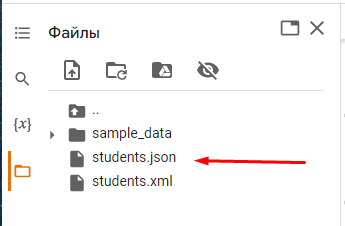

Посмотрим что внутри созданного файла **students.json**

In [ ]:
students_json = open('/content/students.json')
data = json.load(students_json)

In [ ]:
data

{'Ефимов': ['СПбГУ', 'Экономика', '4', 'id54323'],
 'Лазарева': ['МИРЭА', 'Радиотехнический', '2', 'id61626'],
 'Миронов': ['СГУПС', 'Математика и информатика', '5', 'id52783'],
 'Серова': ['МАИ', 'Информатика', '3', 'id91526'],
 'Волков': ['МГТУ', 'Физика', '1', 'id15632']}